In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
file_path = r'C:\Users\Ommo Clark\Downloads\spam.xlsx'  # Updated with your file location
spam_data_cleaned = pd.read_excel(file_path, sheet_name='spam', skiprows=4)

# Check the columns of the dataset
print(spam_data_cleaned.columns)

# Clean the dataset
# Drop any unnamed or unnecessary columns automatically based on the content
spam_data_cleaned.columns = spam_data_cleaned.iloc[0]
spam_data_cleaned = spam_data_cleaned.drop(0).reset_index(drop=True)

# Select the columns relevant for the model (adjust based on what we see from the print statement)
# You can remove the columns that are not needed dynamically
spam_data_cleaned = spam_data_cleaned[['Email_ID', 'win', 'click', 'team', 'claim', 'reminder', 'Category']]

# Convert the feature columns to numeric
feature_columns = ['win', 'click', 'team', 'claim', 'reminder']
spam_data_cleaned[feature_columns] = spam_data_cleaned[feature_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
spam_data_cleaned = spam_data_cleaned.dropna()

# Prepare feature set (X) and target variable (y)
X = spam_data_cleaned[feature_columns]
y = spam_data_cleaned['Category']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Naive Bayes Classifier ----
# Initialize Naive Bayes classifier
nb_model = MultinomialNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Calculate accuracy and print classification report for Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy: ", nb_accuracy)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# ---- K-Nearest Neighbors Classifier ----
# Initialize KNN classifier with k=3 (you can adjust k)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy and print classification report for KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy: ", knn_accuracy)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))


Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Key words', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')
Naive Bayes Accuracy:  1.0
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         Ham       1.00      1.00      1.00         1
        Spam       1.00      1.00      1.00         4

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

KNN Accuracy:  1.0
KNN Classification Report:
               precision    recall  f1-score   support

         Ham       1.00      1.00      1.00         1
        Spam       1.00      1.00      1.00         4

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00   

In [13]:
# Load the dataset
file_path = r'C:\Users\Ommo Clark\Downloads\spam.xlsx'  # Adjust the path
spam_data = pd.read_excel(file_path)

# Print the column names to identify the correct target column name
print(spam_data.columns)



Index(['work only on the test record you are assigned to', 'Unnamed: 1',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')


In [15]:
# Load the dataset and skip the top rows that contain irrelevant data
file_path = r'C:\Users\Ommo Clark\Downloads\spam.xlsx'  # Adjust the path
spam_data = pd.read_excel(file_path, skiprows=4)  # Adjust the number of rows to skip as needed

# Display the first few rows to check the actual structure of the dataset
print(spam_data.head())


  Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0    Dataset   Email_ID   Student1  student 2  student 3   
1      train          1        NaN        NaN        NaN   
2      train          2        NaN        NaN        NaN   
3      train          3        NaN        NaN        NaN   
4      train          4        NaN        NaN        NaN   

                                          Unnamed: 5 Key words Unnamed: 7  \
0                                            Content       win      click   
1                 Click here to win a special prize!         1          1   
2  Team meeting rescheduled. Check the portal and...         0          1   
3              Claim your free vacation package now!         0          0   
4  A reminder for tomorrow's team-building exercise.         0          0   

  Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13  \
0       team      claim    reminder    Category         NaN         NaN   
1          0          0   

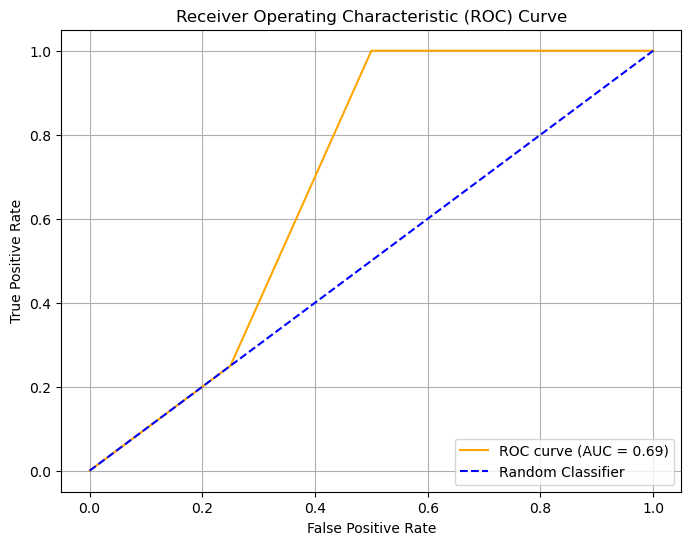

In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset, skip the top irrelevant rows, and rename the columns
file_path = r'C:\Users\Ommo Clark\Downloads\spam.xlsx'  # Adjust the path
spam_data = pd.read_excel(file_path, skiprows=5)

# Rename columns based on the cleaned structure
spam_data.columns = ['Dataset', 'Email_ID', 'Student1', 'Student2', 'Student3', 'Content', 
                     'win', 'click', 'team', 'claim', 'reminder', 'Category', 
                     'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14']

# Drop unnecessary columns
spam_data_cleaned = spam_data[['win', 'click', 'team', 'claim', 'reminder', 'Category']]

# Remove rows with missing or invalid values in the 'Category' column
spam_data_cleaned = spam_data_cleaned.dropna(subset=['Category'])

# Ensure the 'Category' column is properly mapped to numeric values (Ham = 0, Spam = 1)
spam_data_cleaned['Category'] = spam_data_cleaned['Category'].map({'Ham': 0, 'Spam': 1})

# Confirm that 'Category' is numeric and no NaN values remain
spam_data_cleaned = spam_data_cleaned.dropna(subset=['Category'])
spam_data_cleaned = spam_data_cleaned[spam_data_cleaned['Category'].isin([0, 1])]

# Split the dataset into features (X) and target (y)
X = spam_data_cleaned[['win', 'click', 'team', 'claim', 'reminder']]
y = spam_data_cleaned['Category']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Decision Tree Classifier ----
# Initialize the Decision Tree with a reduced max depth to avoid overfitting
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Get predicted probabilities for the test set
y_probs = dt_model.predict_proba(X_test)[:, 1]  # We need the probabilities for the positive class (Spam)

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_probs)

# ---- Plotting the ROC Curve ----
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Random Classifier')

# Add labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Display AUC score on the plot
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
